Example 1

We define a basic perceptron model. (See Example 3.4)

In [3]:
import numpy as np
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target
X = X[:100, :2]
X = X - np.mean(X, axis=0)
y = (y[:100]-0.5)*2

# Define the perceptron model in 2 steps
# 1. compute the linear (affine, the term is discussed later) score
def f_pre(X, w0, w1, b): # pre for pre-activation
    return w0*X[:, 0] + w1*X[:, 1] + b

# 2. define what to do with the score
def f_act(s):
    return 1/(np.exp(-s)+1)

With the computational models ready, we can 

"REPRESENT" 

our hypotheses as a couple of numbers.

In [6]:
percep1 = [0.1, 0.5, -0.4]

score1 = f_pre(X, percep1[0], percep1[1], percep1[2])
predprob1 = f_act(score1)
print(predprob1[:5], y[:5])

[0.4411244  0.3759909  0.39493851 0.38069485 0.4510077 ] [-1. -1. -1. -1. -1.]


Example 2

Now it is clear that once the model is established, the format of input it can
accept has been fixed. 

To apply perceptron model, the data must be prepared in the right format.

In [7]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Define the directories
duck_dir = 'Data/DuckImages/Ducks'
cow_dir = 'Data/DuckImages/Cows'

# Function to load and preprocess images
def load_and_preprocess_images(directory, label):
    images = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith('.webp'):
            image_path = os.path.join(directory, filename)
            image = Image.open(image_path).convert('RGB')
            image = image.resize((32, 32))
            image = np.array(image).astype(np.float32)
            image = (image / 127.5) - 1.0  # Normalize to [-1, 1]
            images.append(image)
            labels.append(label)
    return np.array(images), np.array(labels)

# Load and preprocess images
cow_images, cow_labels = load_and_preprocess_images(cow_dir, 0)
duck_images, duck_labels = load_and_preprocess_images(duck_dir, 1)


# Combine datasets
X = np.concatenate((duck_images, cow_images), axis=0)
y = np.concatenate((duck_labels, cow_labels), axis=0)

# Flatten images for the perceptron model
X = X.reshape(X.shape[0], -1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data to have zero mean and unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the perceptron model
model = Perceptron(fit_intercept=False, max_iter=1000, tol=1e-3, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')


Training Accuracy: 1.00
Test Accuracy: 0.71


In [32]:
import matplotlib.pyplot as plt

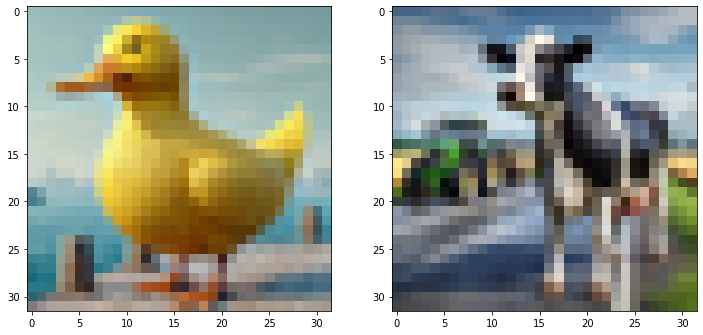

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(duck_images[1]/2+0.5)
axs[1].imshow(cow_images[0]/2+0.5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


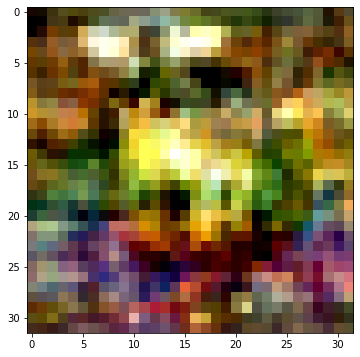

In [37]:
# This is to be studied with discussion on topic 4.3
coeff_im = model.coef_.reshape((32, 32, 3))
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(coeff_im/np.max(np.abs(coeff_im)) + 0.3 )

Example 3

Example of data sample where the order is NOT fixed.

In [57]:
imfile = "Data/duckhw.png"
image = Image.open(imfile).convert('RGB')
image = image.resize((128, 128))
image = (np.array(image)[:, :, 0] > 128).astype(np.float32)
py, px = np.nonzero(1-image)

Note it is the collection that makes sense. 

The order of the data can change.

Try to permute points in px, py, or just take a random subsets

(16.7, 111.3, -127.95, 2.95)

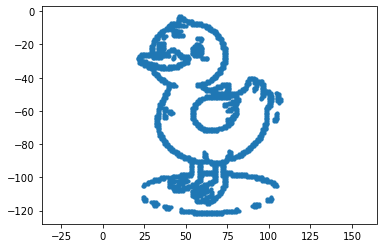

In [61]:
plt.scatter(px, -py, s=10)
plt.axis('equal')

Example 4

Understand perceptron as a FUNCTION on the entire data space. 

I.e. one perceptron object has its behaviour defined EVERYWHERE in the data domain.

(-1.3399999999999999, 1.74, -1.32505, 1.4260500000000003)

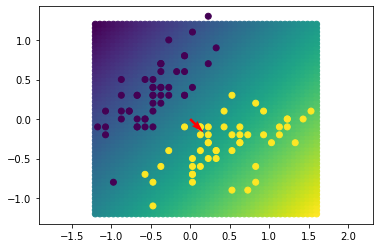

In [74]:
# recall the f_pre we defined above
iris = load_iris()
X, y = iris.data, iris.target
X = X[:100, :2]
X = X - np.mean(X, axis=0)
y = (y[:100]-0.5)*2

xgrid, ygrid = np.meshgrid(np.linspace(-1.2, 1.6, 50), np.linspace(-1.2, 1.2, 50))
gridsamples = np.stack([xgrid.flatten(), ygrid.flatten()]).T



w0 = 0.5
w1 = -0.5
gridscore = f_pre(gridsamples, w0, w1, 0)
plt.scatter(gridsamples[:, 0], gridsamples[:, 1],
            c=gridscore)
plt.scatter(X[:,0], X[:, 1], c=y)
plt.quiver([0], [0], [w0], [w1], color='r')
plt.axis('equal')


<a list of 6 text.Text objects>

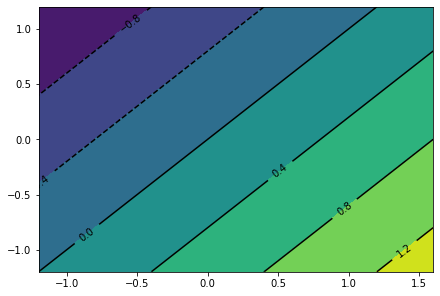

In [79]:
fig2, ax2 = plt.subplots(constrained_layout=True)
ax2.contourf(xgrid, ygrid, gridscore.reshape(xgrid.shape))

C2 = ax2.contour(xgrid, ygrid, gridscore.reshape(xgrid.shape), colors=('k'))
ax2.clabel(C2, inline=True, fontsize=10)

Example 5

What's the limit of linear model and why it is a BLESS.

Try to figure out some W0 and W1 to get the classification "right".

<a list of 6 text.Text objects>

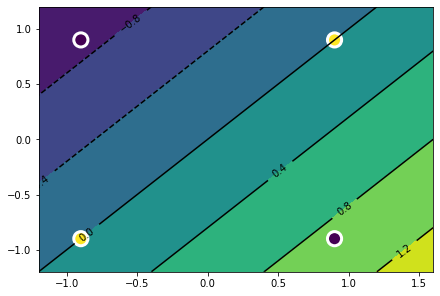

In [91]:
X = np.array(
    [[-1, -1],
     [1, 1],
     [-1, 1],
     [1, -1],
     ]
) * 0.9
y = np.array([1, 1, -1, -1])

w0 = 0.5
w1 = -0.5
gridscore = f_pre(gridsamples, w0, w1, 0)

fig2, ax2 = plt.subplots(constrained_layout=True)
ax2.contourf(xgrid, ygrid, gridscore.reshape(xgrid.shape))

C2 = ax2.contour(xgrid, ygrid, gridscore.reshape(xgrid.shape), colors=('k'))

ax2.scatter(X[:, 0], X[:, 1], c=y, s=200, edgecolors='w', linewidths=3)
ax2.clabel(C2, inline=True, fontsize=10)

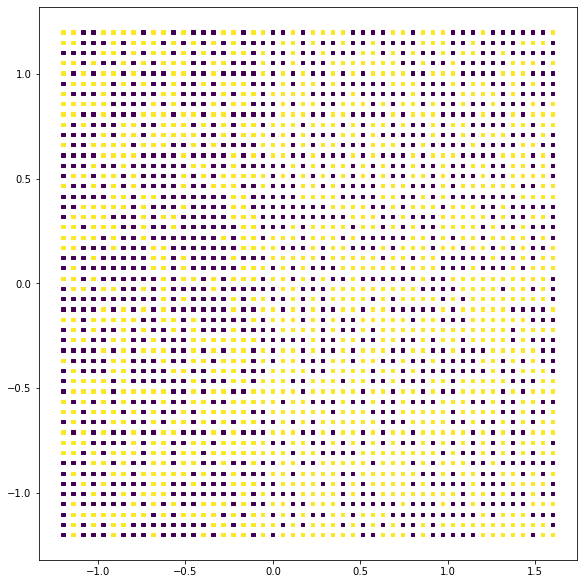

In [113]:
iris = load_iris()
X, y = iris.data, iris.target
X = X[:100, :2]
X = X - np.mean(X, axis=0)
y = (y[:100]-0.5)*2

xgrid, ygrid = np.meshgrid(np.linspace(-1.2, 1.6, 50), np.linspace(-1.2, 1.2, 50))
gridsamples = np.stack([xgrid.flatten(), ygrid.flatten()]).T
rng = np.random.RandomState(42)
gridpred = []
for x_ in gridsamples:
    d = ((X - x_)**2).sum(axis=1)
    if np.min(d) < 0.002:
        i = np.argmin(d)
        gridpred.append(y[i])
    else:
        gridpred.append(rng.choice([-1, 1]))
gridpred = np.array(gridpred).reshape(xgrid.shape)

fig2, ax2 = plt.subplots(constrained_layout=True, figsize=(8,8))
ax2.scatter(xgrid, ygrid, c=gridpred, s=10, marker='s')



# ax2.scatter(X[:, 0], X[:, 1], c=y, s=60, edgecolors='k', linewidths=2)

Example 6

Understand features with sound data.

In [4]:
import sounddevice as sd

sample_rate = 44000  # Sample rate in Hertz
duration = 1  # Duration in seconds

audio = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=1, dtype='float64')
sd.wait()

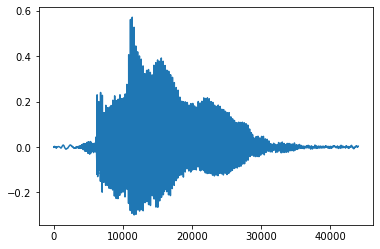

In [5]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(len(audio)), audio)

In [6]:
sd.play(audio)

In [27]:
audio.shape

(44000, 1)

Make a few bases

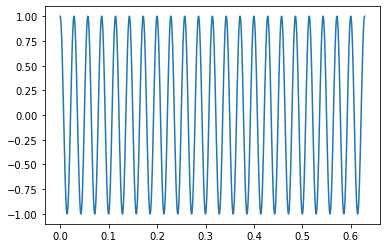

In [7]:
fq1 = 220 
ts = np.linspace(0, np.pi * 2, 44000)
base1 = np.cos(ts*fq1)
# sd.play(base1)
plt.plot(ts[:4400], base1[:4400])

fq2 = fq1 * 4
base2 = np.cos(ts*fq2)

example_bases = [
    np.cos(ts*fq_) for fq_ in [261, 293, 329, 349, 392, 440, 493]
]


In [10]:
b

array([1.        , 0.99752281, 0.99010353, ..., 0.99010353, 0.99752281,
       1.        ])

In [8]:
import time
for i in range(7):
    sd.play(example_bases[i])
    time.sleep(0.5)


Perform Data Collection 

This can run once only.

In [137]:
audios_class1 = []

In [97]:
audio1 = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=1, dtype='float64')
sd.wait()
audios_class1.append(audio1)
print(len(audios_class1))

28


In [136]:
audios_class2 = []

In [91]:
audio2 = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=1, dtype='float64')
sd.wait()
audios_class2.append(audio2)
print(len(audios_class2))

23


In [135]:
import os
import pickle
if not os.path.exists("Data/Sounds.pkl"):
    with open("Data/Sounds.pkl", "wb") as f:
        pickle.dump([audios_class1, audios_class2], f)



In [9]:
import pickle
with open("Data/Sounds.pkl", "rb") as f:
    audios_class1, audios_class2 = pickle.load(f)

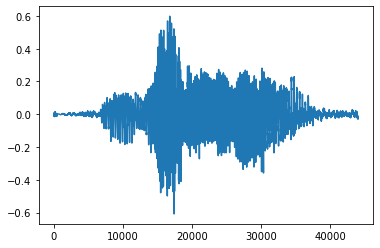

In [11]:
import sounddevice as sd
sd.play(audios_class1[2])
i = 10
plt.plot(np.arange(len(audios_class1[i])), audios_class1[i])

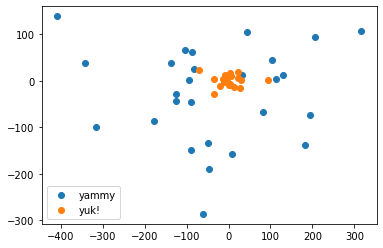

In [12]:
base1 = np.cos(ts*220)
base2 = np.cos(ts*360)
feats_cls1 = np.array([
    np.array([(a_.flatten() * base1).sum(), (a_.flatten() * base2).sum(), ]) for a_ in audios_class1
])
feats_cls2 = np.array([
    np.array([(a_.flatten() * base1).sum(), (a_.flatten() * base2).sum(), ]) for a_ in audios_class2
])
plt.scatter(feats_cls1[:, 0], feats_cls1[:, 1], label="yammy")
plt.scatter(feats_cls2[:, 0], feats_cls2[:, 1], label="yuk!")
# plt.scatter(np.abs(feats_cls1[:, 0]), np.abs(feats_cls1[:, 1]), label="yammy")
# plt.scatter(np.abs(feats_cls2[:, 0]), np.abs(feats_cls2[:, 1]), label="yuk!")
plt.legend()
